In [24]:
from spectacle.core.spectra import Spectrum1D
from spectacle.process.lsf import LSF
import matplotlib.pyplot as plt
import numpy as np

In [25]:
%matplotlib inline

# Generate a spectrum
Create a mock spectrum with an H$\alpha$ ($\lambda = 1215\;\mathrm{\r{A}}$) absorption feature with $f = 0.4164$, $\gamma = 10^5$, $b = 10\; \mathrm{km/s}$, and column density $n = 10^{14.66}\;\mathrm{cm^{-2}}$.

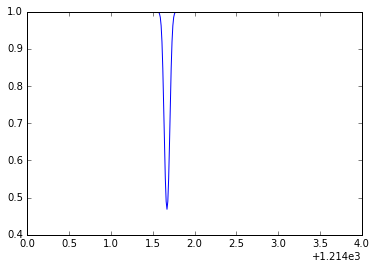

In [40]:
spectrum1 = Spectrum1D()
spectrum1.add_line(lambda_0=1.21567010E+03, f_value=0.4164, gamma=1e5,
                   v_doppler=1e6, column_density=10**13, name="Halpha")

mask = (spectrum1.dispersion > 1214) & (spectrum1.dispersion < 1218)
plt.plot(spectrum1.dispersion[mask], spectrum1.flux[mask])

## Apply noise to the spectrum

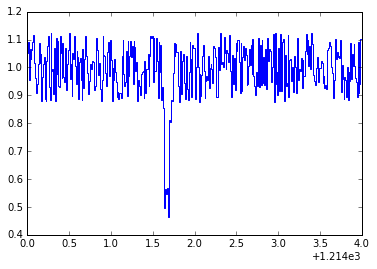

In [41]:
spectrum1.add_noise(variation=0.25)
plt.plot(spectrum1.dispersion[mask], spectrum1.flux[mask], drawstyle='steps')
plt.show()

## Apply the COS LSF

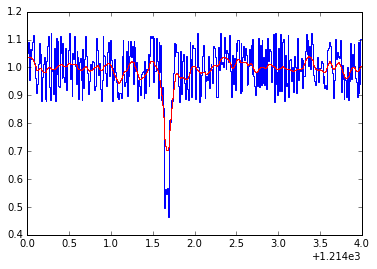

In [42]:
plt.plot(spectrum1.dispersion[mask], spectrum1.flux[mask], drawstyle='steps')
cos_lsf = LSF(instrument='cos')
spectrum1.add_lsf(cos_lsf)
plt.plot(spectrum1.dispersion[mask], spectrum1.flux[mask], drawstyle='steps', color='r')
plt.show()